## Limpeza e tratamento de dados

In [2]:
# Passo 1: Importar bibliotecas para limpeza e análise de dados
import pandas as pd  # Para manipular tabelas (DataFrames)
import seaborn as srn  # Para criar gráficos estatísticos
import statistics as sts  # Para calcular estatísticas (mediana, desvio padrão)

In [3]:
# Passo 2: Carregar dados de churn (abandono de clientes)
# sep=";" = arquivo usa ponto e vírgula como separador
dataset = pd.read_csv("Churn.csv", sep=";")

# Exibir primeiras 5 linhas para conhecer os dados
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
# Verificar tamanho do dataset
# Resultado: (número de linhas, número de colunas)
dataset.shape

(999, 12)

In [5]:
# Passo 3: Renomear colunas com nomes mais claros
dataset.columns = [
    "Id",  # Código único do cliente
    "Score",  # Pontuação de crédito (300-850)
    "Estado",  # Estado onde reside
    "Genero",  # Masculino ou Feminino
    "Idade",  # Idade em anos
    "Patrimonio",  # Valor do patrimônio
    "Saldo",  # Saldo atual da conta
    "Produtos",  # Quantidade de produtos bancários
    "TemCartCredito",  # Tem cartão? (1=sim, 0=não)
    "Ativo",  # Cliente ativo? (1=sim, 0=não)
    "Salario",  # Salário mensal
    "Saiu",  # Abandonou o banco? (VARIÁVEL ALVO)
]

In [6]:
# Verificar se as colunas foram renomeadas corretamente
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
# === ANÁLISE EXPLORATÓRIA: DADOS CATEGÓRICOS ===

# Contar quantos clientes existem por Estado
# groupby + size = contagem por grupo
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

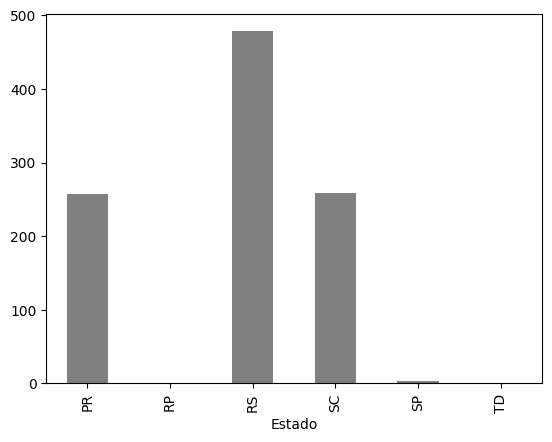

In [8]:
# Gráfico de barras: distribuição por Estado
# Mostra visualmente onde estão concentrados os clientes
agrupado.plot.bar(color="gray")

In [9]:
# Contar clientes por Gênero
# Verificar se há equilíbrio entre homens e mulheres
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

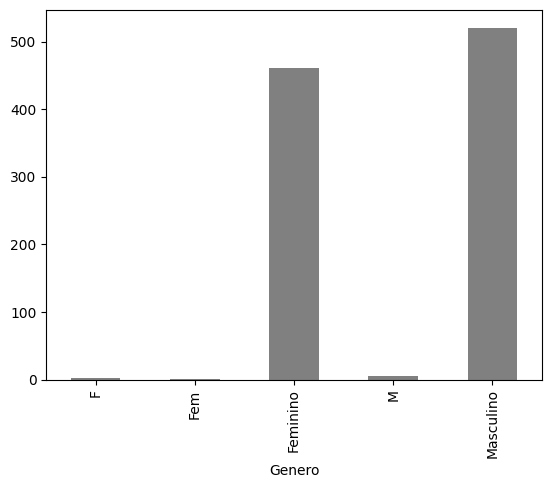

In [10]:
# Gráfico de barras: distribuição por Gênero
agrupado.plot.bar(color="gray")

In [11]:
# === ANÁLISE EXPLORATÓRIA: DADOS NUMÉRICOS ===

# Estatísticas do Score de Crédito
# describe() = resumo: média, mediana, min, max, quartis
dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

In [12]:
# Boxplot do Score: detectar valores extremos (outliers)
# Caixa = quartis, linha = mediana, pontos = outliers
srn.boxplot(x=dataset["Score"]).set_title("Score")

In [13]:
# Histograma do Score: formato da distribuição
# Mostra se os dados são normais, assimétricos, etc.
srn.displot(x=dataset["Score"]).set_titles("Score")

In [14]:
# Estatísticas da Idade dos clientes
# Verificar idades mínima, máxima e valores estranhos
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

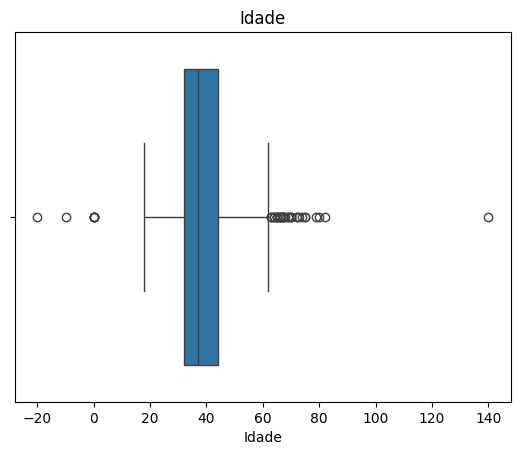

In [15]:
# Boxplot da Idade: identificar outliers
srn.boxplot(x=dataset["Idade"]).set_title("Idade")

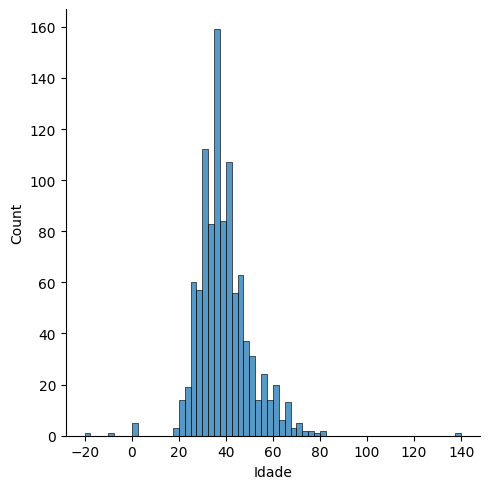

In [16]:
# Histograma da Idade: formato da distribuição
srn.displot(dataset["Idade"])

In [17]:
# Estatísticas do Saldo das contas
# Entender perfil financeiro: saldos baixos, altos, negativos
dataset["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

In [18]:
# Boxenplot do Saldo: análise detalhada de distribuição
# Melhor que boxplot normal para muitos dados
srn.boxenplot(x=dataset["Saldo"]).set_title("Saldo")

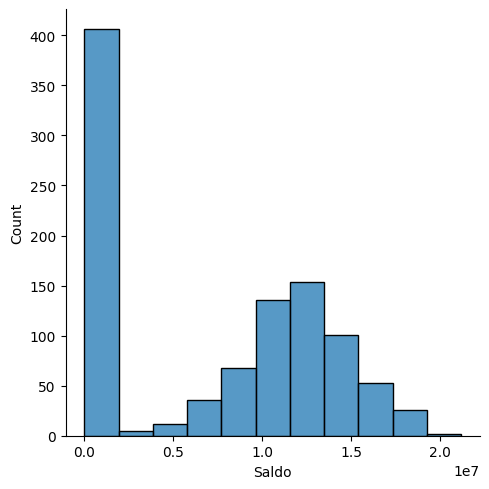

In [19]:
# Histograma do Saldo: distribuição dos valores
srn.displot(dataset["Saldo"])

In [20]:
# Estatísticas do Salário dos clientes
# Verificar valores extremos e inconsistências
dataset["Salario"].describe()

Text(0.5, 1.0, 'Salario')

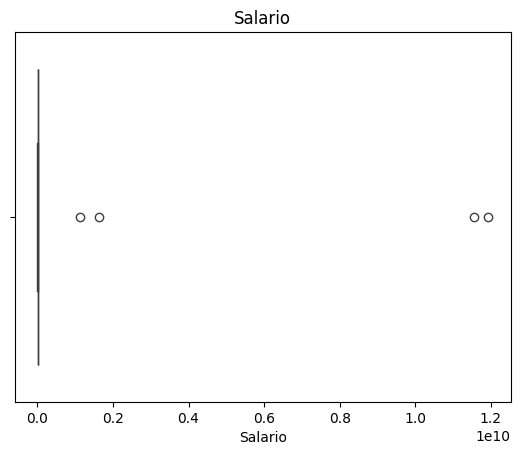

In [21]:
# Boxplot do Salário: identificar outliers
srn.boxplot(x=dataset["Salario"]).set_title("Salario")

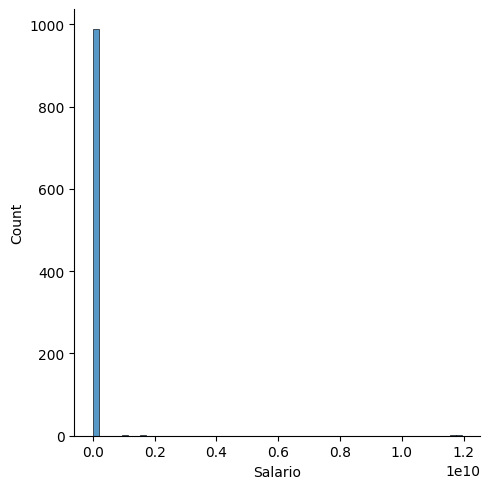

In [22]:
# Histograma do Salário: distribuição dos valores
srn.displot(dataset["Salario"])

In [23]:
# === LIMPEZA DE DADOS: VALORES FALTANTES ===

# Contar valores em branco (NaN) por coluna
# isnull().sum() = quantos dados estão faltando
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [24]:
# Problema: Salários com valores em branco (NaN)
# Solução: Substituir pela mediana (valor do meio)
dataset["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [25]:
# Calcular mediana dos salários (ignorando NaN automaticamente)
mediana = sts.median(dataset["Salario"])
mediana

70518.0

In [26]:
# Preencher valores em branco com a mediana
# fillna() = substitui NaN pelo valor escolhido
dataset["Salario"] = dataset["Salario"].fillna(mediana)

In [27]:
# Verificar se ainda há valores em branco em Salario
dataset["Salario"].isnull().sum()

np.int64(0)

In [28]:
# Problema: Gênero com valores inconsistentes e em branco
# Verificar quantos registros existem por categoria
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [29]:
# Contar quantos gêneros estão em branco
dataset["Genero"].isnull().sum()

np.int64(8)

In [30]:
# Preencher gêneros em branco com "Masculino" (valor mais frequente)
dataset["Genero"] = dataset["Genero"].fillna("Masculino")

In [31]:
# Verificar se ainda há gêneros em branco
dataset["Genero"].isnull().sum()

np.int64(0)

In [32]:
# Padronizar nomes de gênero:
# "M" vira "Masculino", "Fem" e "F" viram "Feminino"
dataset.loc[dataset["Genero"] == "M", "Genero"] = "Masculino"
dataset.loc[dataset["Genero"].isin(["Fem", "F"]), "Genero"] = "Feminino"

# Verificar resultado da padronização
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [33]:
# Analisar estatísticas da Idade para detectar valores estranhos
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [34]:
# Problema: Idades inválidas (menores que 0 ou maiores que 120)
# Buscar registros com idades impossíveis
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [37]:
# Calcular mediana das idades para substituir valores inválidos
mediana = sts.median(dataset["Idade"])
mediana

37

In [36]:
# Corrigir idades inválidas substituindo pela mediana
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120), "Idade"] = mediana

In [38]:
# Verificar se ainda existem idades inválidas
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [39]:
# Problema: Registros duplicados (mesmo ID)
# Buscar todos os IDs que aparecem mais de uma vez
dataset[dataset.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [40]:
# Remover duplicados: manter apenas o primeiro registro de cada ID
# inplace=True = alterar o dataset original
dataset.drop_duplicates(subset="Id", keep="first", inplace=True)


# Verificar se ainda existem duplicados
dataset[dataset.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [42]:
# Problema: Estados com siglas incorretas ou inválidas
# Verificar todos os estados presentes nos dados
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [43]:
# Corrigir siglas inválidas: "RP", "SP", "TD" viram "RS" (mais frequente)
dataset.loc[dataset["Estado"].isin(["RP", "SP", "TD"]), "Estado"] = "RS"
agrupado = dataset.groupby(["Estado"]).size()

In [44]:
# Verificar resultado da correção dos Estados
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [45]:
# Problema: Salários extremos (outliers)
# Calcular desvio padrão para definir limite de 2 desvios
desvio = sts.stdev(dataset["Salario"])
desvio

528988918.4679201

In [46]:
# Critério: salários ≥ 2 desvios padrão são outliers
# Buscar registros que atendem este critério
dataset.loc[dataset["Salario"] >= 2 * desvio]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [47]:
# Calcular mediana atual dos salários (para substituir outliers)
mediana = sts.median(dataset["Salario"])
mediana

8637195.5

In [48]:
# Corrigir outliers: substituir salários extremos pela mediana
dataset.loc[dataset["Salario"] >= 2 * desvio, "Salario"] = mediana

# Verificar se ainda existem outliers
dataset.loc[dataset["Salario"] >= 2 * desvio]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [49]:
# === RESULTADO FINAL ===

# Visualizar primeiras linhas dos dados limposdataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [52]:
# Verificar tamanho final do dataset após limpeza
dataset.shape

(998, 12)